In [131]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [132]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [135]:
x= test_images[666]
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  6 73163182254254254182  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 41185253254253206222253181  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 95146235237184101 36 24213253135  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 72254249176 31  0  0  0 76253253 20  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0155254133  0  0  0  0  0192253220  0  0  

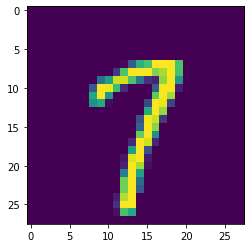

In [136]:
import matplotlib.pyplot as pl
pl.imshow(x)
pl.imshow(x)

In [137]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(256,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [138]:
network.compile(
    optimizer = 'Nadam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [139]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/ 255

In [140]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [141]:
network.fit(train_images,train_labels,epochs=16,batch_size=128,validation_split=0.2)

Epoch 1/16
375/375 [==============================] - 8s 18ms/step - loss: 0.2566 - accuracy: 0.9244 - val_loss: 0.1213 - val_accuracy: 0.9634
Epoch 2/16
375/375 [==============================] - 7s 17ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.1007 - val_accuracy: 0.9699
Epoch 3/16
375/375 [==============================] - 7s 18ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0872 - val_accuracy: 0.9736
Epoch 4/16
375/375 [==============================] - 7s 18ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0893 - val_accuracy: 0.9722
Epoch 5/16
375/375 [==============================] - 7s 18ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0831 - val_accuracy: 0.9766
Epoch 6/16
375/375 [==============================] - 7s 19ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0979 - val_accuracy: 0.9747
Epoch 7/16
375/375 [==============================] - 7s 19ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.1073 - val_accuracy: 0.9736

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


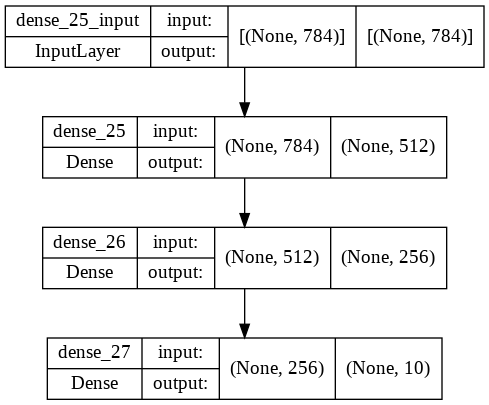

In [142]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)

In [143]:
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0985 - accuracy: 0.9800
test_acc: 0.9800000190734863
